In [1]:
import pandas as pd
from pandas import Series, DataFrame

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.express as px

from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots

import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)


In [2]:
#creating paths
path = "/Users/mdhaliwal/Documents/MDSI/2021/36104-DVN/AT3/PartB/"
file1 = "Airplane_Crashes_and_Fatalities_Since_1908_2019_v2.xlsx"
df1 = pd.read_excel(path+file1)

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4978 non-null   datetime64[ns]
 1   Time                   3467 non-null   object        
 2   Location               4978 non-null   object        
 3   Operator               4968 non-null   object        
 4   Flight #               1320 non-null   object        
 5   Route                  4208 non-null   object        
 6   AC Type                4963 non-null   object        
 7   Registration           4704 non-null   object        
 8   cn/ln                  4310 non-null   object        
 9   Aboard                 4960 non-null   float64       
 10  Aboard Passangers      4978 non-null   int64         
 11  Aboard Crew            4978 non-null   int64         
 12  Fatalities             4978 non-null   int64         
 13  Fat

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4978 non-null   datetime64[ns]
 1   Time                   3467 non-null   object        
 2   Location               4978 non-null   object        
 3   Operator               4968 non-null   object        
 4   Flight #               1320 non-null   object        
 5   Route                  4208 non-null   object        
 6   AC Type                4963 non-null   object        
 7   Registration           4704 non-null   object        
 8   cn/ln                  4310 non-null   object        
 9   Aboard                 4960 non-null   float64       
 10  Aboard Passangers      4978 non-null   int64         
 11  Aboard Crew            4978 non-null   int64         
 12  Fatalities             4978 non-null   int64         
 13  Fat

In [5]:
# Word Cloud
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

from nltk.corpus import stopwords

import collections

import string

In [6]:
df2 = df1[(df1["Country (location)"] == "United States") & 
          (df1["Operator Type"] == "Commercial - Passenger") &
          (df1["Decade"] == "1960s") | 
          (df1["Decade"] == "1970s") | 
          (df1["Decade"] == "1980s") | 
          (df1["Decade"] == "1990s") | 
          (df1["Decade"] == "2000s") | 
          (df1["Decade"] == "2010s") | 
          (df1["Decade"] == "2020s")
         ]
df2.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,...,Destination.lat,Destination.lon,Operator Type,Year,Month,Day,Decade,Region,Has Fatality,Manufacturer
9,1971-07-25,13:21:00,"Manila, Philippines",Pan American World Airways,NaN,San Francisco - Honolulu - Guam - Manila - Siagon,Boeing 707-321CF,N461PA,NaN,4.0,...,7.8512,16.989,Commercial - Passenger,1971,July,Sunday,1970s,Asia & Pacific,1,Boeing
11,1967-03-10,05:03:00,"Near Klamath Falls, Oregon",West Coast Airlines,720,Klamath Falls - Medford - North Bend - Portlan...,Fairchild F-27,N2712,73,4.0,...,47.6038,-122.33,Commercial - Passenger,1967,March,Friday,1960s,North America,1,Fairchild
24,2005-03-16,13:57:00,"Varandey, Russia",Regional Airlines,NaN,Ufa - Usinsk - Perm - Varandey - Naryan Mar,Antonov 24,RA-46489,27308107,52.0,...,67.638,53.0071,Commercial - Passenger,2005,March,Wednesday,2000s,Europe,1,Antonov
25,1976-06-01,07:48:00,"Nacias Nguema, Equatorial Guinea",Aeroflot,SU-418,\tLuanda - Malabo - N’Djamena - Tripoli - Moscow,Tupolev TU-154A,CCCP-85102,102,45.0,...,55.7505,37.6175,Commercial - Passenger,1976,June,Tuesday,1970s,Africa,1,Tupolev
28,1986-05-03,09:05:00,"Colombo, Sri Lanka",Air Lanka,512,London - Zurich - Dubai - Colombo - Male,Lockheed L-1011-100,4R-ULD,1061,150.0,...,16.37,-2.29002,Commercial - Passenger,1986,May,Saturday,1980s,Asia & Pacific,1,Lockheed


In [7]:
text = " ".join(df2.Summary.astype(str))
wordcloud1 = WordCloud().generate(text)

In [23]:
stop = stopwords.words('english')
stop.append("crashed")
stop.append("aircraft")
stop.append("airplane")
stop.append("plane")
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
text_spl = text.translate(str.maketrans('', '', string.punctuation)).lower().split()
text_spl

['while',
 'on',
 'a',
 'vordme',
 'approach',
 'to',
 'manila',
 'runway',
 '24',
 'the',
 'cargo',
 'aircraft',
 'struck',
 'mount',
 'kamunay',
 'at',
 'an',
 'altitude',
 'of',
 '2525',
 'feet',
 '20',
 'miles',
 'eastnortheast',
 'of',
 'the',
 'manila',
 'vor',
 'the',
 'probable',
 'cause',
 'was',
 'improper',
 'crew',
 'coordination',
 'which',
 'caused',
 'a',
 'premature',
 'descent',
 'the',
 'aircraft',
 'struck',
 'the',
 'northwestern',
 'slope',
 'of',
 'stukel',
 'mountain',
 'just',
 'after',
 'takeoff',
 'loss',
 'of',
 'control',
 'due',
 'to',
 'ice',
 'accretion',
 'on',
 'airframe',
 'surfaces',
 'the',
 'pilot',
 'should',
 'have',
 'required',
 'that',
 'deicing',
 'fluid',
 'be',
 'applied',
 'prior',
 'to',
 'takeoff',
 'the',
 'russian',
 'turboprop',
 'carrying',
 'oil',
 'workers',
 'crashed',
 'into',
 'the',
 'ground',
 'and',
 'caught',
 'fire',
 'while',
 'on',
 'final',
 'approach',
 'to',
 'varandey',
 'in',
 'heavy',
 'fog',
 'the',
 'plane’s',
 'cr

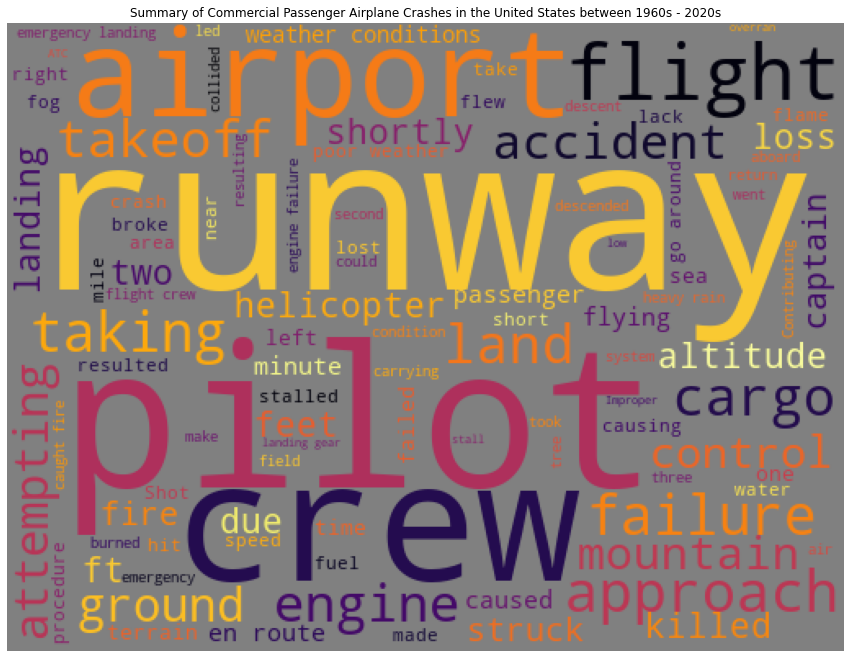

In [28]:
plt.subplots(figsize = (15,15))
wordcloud1 = WordCloud(stopwords = stop , background_color = 'grey', width = 512, height = 384, 
                       max_words = 100, colormap = 'inferno_r', min_font_size = 6).generate(text)
plt.imshow(wordcloud1) # image show
plt.axis('off')
plt.title('Summary of Commercial Passenger Airplane Crashes in the United States between 1960s - 2020s')
plt.show()